In [1]:
# Import the necessary library
import skimage.io as io
import skimage.color as color
import skimage.transform as xform
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
#import matplotlib as plt
import nibabel as nib

In [2]:
#list out files in folder location
!ls

8bitconverted
9968_19_central_block_100.tif
9968_19_central_block_101.tif
9968_19_central_block_102.tif
9968_19_central_block_103.tif
9968_19_central_block_104.tif
9968_19_central_block_105.tif
9968_19_central_block_106.tif
9968_19_central_block_107.tif
9968_19_central_block_108.tif
9968_19_central_block_109.tif
9968_19_central_block_10.tif
9968_19_central_block_110.tif
9968_19_central_block_111.tif
9968_19_central_block_112.tif
9968_19_central_block_113.tif
9968_19_central_block_114.tif
9968_19_central_block_115.tif
9968_19_central_block_116.tif
9968_19_central_block_117.tif
9968_19_central_block_118.tif
9968_19_central_block_119.tif
9968_19_central_block_11.tif
9968_19_central_block_120.tif
9968_19_central_block_121.tif
9968_19_central_block_122.tif
9968_19_central_block_123.tif
9968_19_central_block_124.tif
9968_19_central_block_125.tif
9968_19_central_block_126.tif
9968_19_central_block_127.tif
9968_19_central_block_128.tif
9968_19_central_block_129.tif
9968_19_central_block_12.tif

In [4]:
# Load an image from a file named 'case#_central_block_section#.tif'
img = nib.load('9968_19_central_block_180.tif')
# Get the image data from the loaded image
data = img.get_fdata()

ImageFileError: Cannot work out file type of "9968_19_central_block_180.tif"

In [4]:
# Uncomment the next line to display the original image using matplotlib
#plt.imshow(img)

# Uncomment the next line to Check the shape of the image (dimensions and channels)
#img.shape

#Uncomment the next line to Convert the original image to grayscale using skimage's rgb2gray function
#img_gry = color.rgb2gray(img)


#Uncomment the next line to Display the grayscale image using matplotlib with the 'gray' colormap
#plt.imshow(img_gry, cmap='gray'

In [5]:
# Display the shape of the loaded image 'img'
# This line prints the dimensions of the image as a tuple (height, width, channels)
img.shape

# Print the image data to the console
# This line outputs the raw image data, showing pixel values and structure
print(img)

# Uncomment the next line to display the image data as a grayscale image using matplotlib
#plt.imshow(data, cmap='gray')


<class 'nibabel.nifti1.Nifti1Image'>
data shape (936, 1404)
affine: 
[[ 0.0174  0.      0.      0.    ]
 [ 0.      0.0174  0.      0.    ]
 [ 0.      0.      0.12    0.    ]
 [ 0.      0.      0.      1.    ]]
metadata:
<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : 
db_name         : 
extents         : 0
session_error   : 0
regular         : 
dim_info        : 0
dim             : [   2  936 1404    1    1    1    1    1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : uint8
bitpix          : 8
slice_start     : 0
pixdim          : [ 1.      0.0174  0.0174  0.12    1.      1.      1.      1.    ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 0
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : 
aux_file

In [6]:
# Create an empty 3D volume with dimensions x x y x z
# This line uses the 'np.zeros()' function from the NumPy library to initialize a 3D array
vol = np.zeros((936,1404,70))

In [7]:
# Define a range of numbers 
# These numbers will be used to construct file names for loading NIfTI images
count = 0

# Initialize a counter to keep track of the current index in the volume 'vol'
numbers=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70]

# Loop through each number in the 'numbers' list
for i in numbers:
    # Create the file name based on the number
    file_name = 'P2694_-4_{}.nii'.format(i)
    
    # Load a NIfTI image from the file
    img = nib.load(file_name)
    # Get the image data from the loaded NIfTI image
    data = img.get_fdata()
    
     # Uncomment the next line if grayscale conversion is intended
    # Convert the image to grayscale using skimage's rgb2gray function
    #img_gry = color.rgb2gray(img)
    
    # Check if the loaded image's dimensions match the dimensions of the 'vol' volume
    #test file size
    if img.shape[0] != vol.shape[0] or img.shape[1] != vol.shape[1]:
        # Print a message if the dimensions are wrong and resize the image to match
        print(file_name+' size is wrong. Resizing...')
        data = xform.resize(data,(vol.shape[0],vol.shape[1]))
    
     # Place the image data into the volume at the current index
        vol[:,:,count] = data
    # Increment the counter for the next iteration
    count += 1

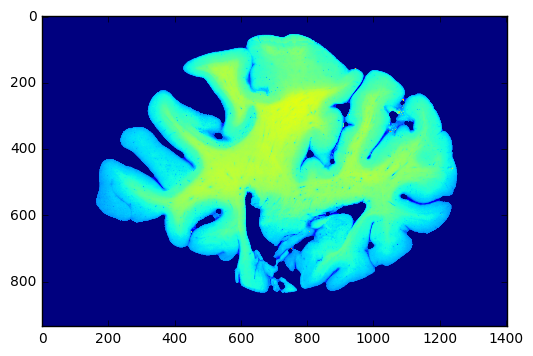

In [12]:
# Display a 2D slice of the volume 'vol' at the 30th index along the Z-axis
# This line uses the 'imshow()' function from matplotlib to visualize a slice of the 3D volume
# The indexing '[:,:,30]' selects a 2D slice from the volume at the Z-axis index 30
plt.imshow(vol[:,:,30])

# Display a grayscale image using 'img_gry' variable (commented out in this context)
# Uncommenting this line would display a grayscale image using the 'imshow()' function
#plt.imshow(img_gry)

# Show the plotted image(s)
plt.show()

In [9]:
# Define an affine transformation matrix M
# This matrix defines the transformation from voxel coordinates to world coordinates
# It includes information about voxel size, orientation, and origin
M = [[0.0174,0,0,0],# Voxel size and orientation along X-axis
     [0,0.0174,0,0], # Voxel size and orientation along Y-axis
     [0,0,0.120,0], # Voxel size and orientation along Z-axis
     [0,0, 0, 0.3]] # Origin and scaling factor

# Create a NIfTI image using the provided volume data 'vol' and the affine transformation matrix 'M'
nii = nib.Nifti1Image(vol,M)

In [10]:
# Save the NIfTI image 'nii' to a file named 'case#_stack.nii'
# This line of code uses the 'nib.save()' function from the nibabel library to save the NIfTI image data
# The file name 'case#_stack.nii' is provided as the second argument
nib.save(nii,'4_stack.nii')